In [107]:
import pandas as pd
from datetime import *
import re
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("all_month.csv")

In [3]:
df.head().T

,0,1,2,3,4
time,2020-03-23T01:42:40.710Z,2020-03-23T01:41:29.080Z,2020-03-23T01:39:22.697Z,2020-03-23T01:38:18.620Z,2020-03-23T01:32:25.360Z
latitude,38.8223,32.7797,62.8165,36.0046,59.0475
longitude,-122.842,-115.44,-151.111,-96.7755,-153.207
depth,2.04,8.1,78.2,3.17585,27.1
mag,0.89,1.39,2,1.62,1.8
magType,md,ml,ml,ml,ml
nst,21,16,NaN,23,NaN
gap,53,115,NaN,103.471,NaN
dmin,0.005756,0.02618,NaN,0.02467,NaN
rms,0.02,0.21,0.57,0.489988,0.41


In [4]:
df.shape

(11967, 22)

In [5]:
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [6]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,11967.000000,11967.000000,11967.000000,11962.000000,8930.000000,9761.000000,9428.000000,11967.000000,8784.000000,11966.000000,9328.000000,9736.000000
mean,38.861621,-117.030178,18.254936,1.437407,16.907727,133.579266,0.326887,0.246868,1.270481,2.593442,0.210239,12.481717
std,17.229752,54.744369,45.146930,1.174021,14.581587,69.392593,1.363219,0.249796,2.399303,16.940414,0.366660,26.296790
min,-60.696100,-179.953800,-3.310000,-1.390000,0.000000,13.000000,0.000000,0.000000,0.090000,0.000000,0.000000,0.000000
25%,33.688583,-150.808600,3.000000,0.690000,7.000000,78.000000,0.024670,0.090000,0.300000,0.440000,0.107000,4.000000
50%,38.210800,-119.728100,7.650000,1.290000,12.000000,119.720000,0.057550,0.158500,0.480000,0.720000,0.161000,6.000000
75%,52.052000,-116.012750,13.000000,2.000000,21.000000,180.000000,0.123925,0.298250,0.910000,1.330000,0.234000,13.000000
max,79.968300,179.973800,634.870000,6.300000,104.000000,360.000000,34.518000,1.830000,31.900000,1554.800000,5.640000,594.000000


In [7]:
(df.isnull().sum()/len(df)).sort_values(ascending=False)

horizontalError    0.265981
nst                0.253781
magError           0.220523
dmin               0.212167
magNst             0.186429
gap                0.184340
mag                0.000418
magType            0.000418
depthError         0.000084
magSource          0.000000
latitude           0.000000
longitude          0.000000
depth              0.000000
net                0.000000
rms                0.000000
locationSource     0.000000
id                 0.000000
updated            0.000000
place              0.000000
type               0.000000
status             0.000000
time               0.000000
dtype: float64

In [8]:
for col in df.columns:
    if df[col].isnull().sum() > 0:
        print(col,"   ",df[col].dtypes,"   ",df[col].isnull().sum())

mag     float64     5
magType     object     5
nst     float64     3037
gap     float64     2206
dmin     float64     2539
horizontalError     float64     3183
depthError     float64     1
magError     float64     2639
magNst     float64     2231


In [9]:
first_n_entries=5
for col,col_type in df.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',df[col].nunique(),'unique entries; first ',first_n_entries,'are')
        print(df[col][0:first_n_entries])


 time has 11967 unique entries; first  5 are
0    2020-03-23T01:42:40.710Z
1    2020-03-23T01:41:29.080Z
2    2020-03-23T01:39:22.697Z
3    2020-03-23T01:38:18.620Z
4    2020-03-23T01:32:25.360Z
Name: time, dtype: object

 magType has 8 unique entries; first  5 are
0    md
1    ml
2    ml
3    ml
4    ml
Name: magType, dtype: object

 net has 14 unique entries; first  5 are
0    nc
1    ci
2    ak
3    ok
4    ak
Name: net, dtype: object

 id has 11967 unique entries; first  5 are
0      nc73357550
1      ci39111895
2    ak0203tafndd
3      ok2020ftyl
4    ak0203tae5go
Name: id, dtype: object

 updated has 11966 unique entries; first  5 are
0    2020-03-23T01:44:19.718Z
1    2020-03-23T01:45:07.104Z
2    2020-03-23T01:45:28.061Z
3    2020-03-23T01:41:35.241Z
4    2020-03-23T01:35:55.164Z
Name: updated, dtype: object

 place has 5663 unique entries; first  5 are
0           9km NW of The Geysers, CA
1            7km WSW of Holtville, CA
2        75km NW of Talkeetna, Alaska
3        2k

In [10]:
for col in df.columns:
    print("-----------------------")
    print("Number of unique entries for",col," is ",df[col].nunique())
    print(df[col].value_counts().head(5))

-----------------------
Number of unique entries for time  is  11967
2020-03-13T19:08:39.400Z    1
2020-03-10T22:47:35.694Z    1
2020-03-17T11:44:56.820Z    1
2020-03-19T01:17:05.718Z    1
2020-03-03T17:34:38.810Z    1
Name: time, dtype: int64
-----------------------
Number of unique entries for latitude  is  9960
52.066333    9
52.064000    7
52.068167    7
52.068000    7
52.067167    7
Name: latitude, dtype: int64
-----------------------
Number of unique entries for longitude  is  10122
-122.818169    10
-176.121333     8
-176.118833     8
-176.121000     8
-176.113000     7
Name: longitude, dtype: int64
-----------------------
Number of unique entries for depth  is  3139
10.0    441
0.0     238
5.0     158
12.0    133
11.0    124
Name: depth, dtype: int64
-----------------------
Number of unique entries for mag  is  516
1.4    289
1.1    236
1.2    234
1.3    223
1.6    216
Name: mag, dtype: int64
-----------------------
Number of unique entries for magType  is  8
ml     7698
md    

Is there any duplicated rows

In [11]:
df[df.duplicated()].shape[0]

0

Columns LocationSource and magSource appear to have same values. Are they exactly same?

In [12]:
df[df['locationSource'] != df['magSource']]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
2481,2020-03-16T17:39:17.112Z,-29.4811,-71.9742,10.00,4.0,ml,NaN,211.0,0.774,0.69,...,2020-03-16T21:58:31.040Z,"80km NW of Coquimbo, Chile",earthquake,4.4,1.7,NaN,NaN,reviewed,us,guc
4302,2020-03-11T17:04:24.820Z,-30.2892,-72.2916,6.26,4.8,mwr,NaN,93.0,0.684,0.63,...,2020-03-11T17:31:41.040Z,"98km WSW of Coquimbo, Chile",earthquake,4.7,1.9,NaN,NaN,reviewed,us,guc
10039,2020-02-26T20:21:32.549Z,-30.9747,-71.4642,45.73,4.8,mwr,NaN,80.0,0.334,1.06,...,2020-03-05T16:59:10.738Z,"48km SSW of Ovalle, Chile",earthquake,5.7,4.9,NaN,NaN,reviewed,us,guc
10430,2020-02-26T01:23:39.569Z,-21.3922,-67.2189,191.74,4.4,mwr,NaN,45.0,1.789,0.72,...,2020-03-18T01:46:39.040Z,"111km SSW of Uyuni, Bolivia",earthquake,8.3,8.8,NaN,NaN,reviewed,us,guc
10516,2020-02-25T19:45:54.821Z,50.3669,-176.8935,10.00,3.0,ml,NaN,234.0,1.496,0.57,...,2020-03-20T15:15:23.040Z,"169km S of Adak, Alaska",earthquake,4.7,2.0,NaN,NaN,reviewed,us,ak


5 values are different

In [13]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna('No info')
    else:
        df[col] = df[col].fillna(value=0)

Creating a new column for measuring the impact of the Earthquake

In [14]:
df['mag'] = df['mag'].fillna(value=0)
df['Impact'] = pd.cut(df['mag'],labels=['Low','Medium','High','Very High'],bins=[-2.,2.,4.,6.,9.])
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,Impact
0,2020-03-23T01:42:40.710Z,38.822334,-122.842331,2.040000,0.89,md,21.0,53.000000,0.005756,0.020000,...,"9km NW of The Geysers, CA",earthquake,0.180000,0.460000,0.010,3.0,automatic,nc,nc,Low
1,2020-03-23T01:41:29.080Z,32.779667,-115.440167,8.100000,1.39,ml,16.0,115.000000,0.026180,0.210000,...,"7km WSW of Holtville, CA",earthquake,0.600000,0.930000,0.164,17.0,automatic,ci,ci,Low
2,2020-03-23T01:39:22.697Z,62.816500,-151.111100,78.200000,2.00,ml,0.0,0.000000,0.000000,0.570000,...,"75km NW of Talkeetna, Alaska",earthquake,0.000000,0.900000,0.000,0.0,automatic,ak,ak,Low
3,2020-03-23T01:38:18.620Z,36.004612,-96.775536,3.175847,1.62,ml,23.0,103.471464,0.024670,0.489988,...,"2km NNW of Cushing, Oklahoma",earthquake,2.533644,2.300347,0.000,19.0,automatic,ok,ok,Low
4,2020-03-23T01:32:25.360Z,59.047500,-153.206900,27.100000,1.80,ml,0.0,0.000000,0.000000,0.410000,...,"112km SW of Anchor Point, Alaska",earthquake,0.000000,3.800000,0.000,0.0,automatic,ak,ak,Low


In [15]:
df['Impact'].value_counts()

Low          9026
Medium       2292
High          645
Very High       4
Name: Impact, dtype: int64

In [16]:
df.isnull().sum()

time               0
latitude           0
longitude          0
depth              0
mag                0
magType            0
nst                0
gap                0
dmin               0
rms                0
net                0
id                 0
updated            0
place              0
type               0
horizontalError    0
depthError         0
magError           0
magNst             0
status             0
locationSource     0
magSource          0
Impact             0
dtype: int64

Converting time column to type datetime 

In [17]:
df['time'] = df['time'].map(lambda x: re.sub('[^0-9\-\.\:]',' ',x))
df['time'] = pd.to_datetime(df['time'])
df.drop(columns='updated',inplace=True)

In [18]:
df.head(5).T

,0,1,2,3,4
time,2020-03-23 01:42:40.710000,2020-03-23 01:41:29.080000,2020-03-23 01:39:22.697000,2020-03-23 01:38:18.620000,2020-03-23 01:32:25.360000
latitude,38.8223,32.7797,62.8165,36.0046,59.0475
longitude,-122.842,-115.44,-151.111,-96.7755,-153.207
depth,2.04,8.1,78.2,3.17585,27.1
mag,0.89,1.39,2,1.62,1.8
magType,md,ml,ml,ml,ml
nst,21,16,0,23,0
gap,53,115,0,103.471,0
dmin,0.005756,0.02618,0,0.02467,0
rms,0.02,0.21,0.57,0.489988,0.41


In [19]:
df['place'] = df['place'].str.split(', ',n=1,expand=True)[1]

In [54]:
df['place'].value_counts()

CA                                3894
Alaska                            3243
Puerto Rico                       1107
Nevada                             737
Hawaii                             722
Utah                               431
Montana                            311
Washington                         257
Oklahoma                           159
California                          90
Indonesia                           83
Canada                              53
Japan                               49
Philippines                         45
Wyoming                             43
Oregon                              39
Idaho                               37
Chile                               33
Turkey                              32
Russia                              32
Fiji                                31
New Zealand                         28
Tonga                               28
B.C., MX                            27
Tennessee                           27
Papua New Guinea         

In [86]:
states_us = ['Alabama', 'California', 'Alaska', 'Arizona', 'Arkansas', 'CA', 'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Wyoming', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington', 'Wisconsin', 'West Virginia']

In [87]:
#l = ['CA','Alaska','Nevada','Hawaii','Utah','Montana','Washington','Kansas','Mississippi','California','New York','South Carolina','Kentucky','Illinois','New Mexico','North Carolina','Missouri','Texas','Colorado','Tennessee','Wyoming','']
#df['Country'] = df[df['place'].isin (states_us)]['place']
df['Country'] = df['place'].apply(lambda x: 'USA' if x in states_us else x)

In [88]:
df['State'] = df['place'].apply(lambda x: 'NA' if x not in states_us else x)

In [95]:
df.drop(columns = 'place', inplace=True)

Hypotheses 1:

Given the data about earthquakes, I could hypothesize that Indonesia experience more earthquakes in a month than Egypt as Indonesia lies in the ring of fire. My claim is based on the source: https://news.sky.com/story/ring-of-fire-why-indonesia-has-so-many-earthquakes-11514214 

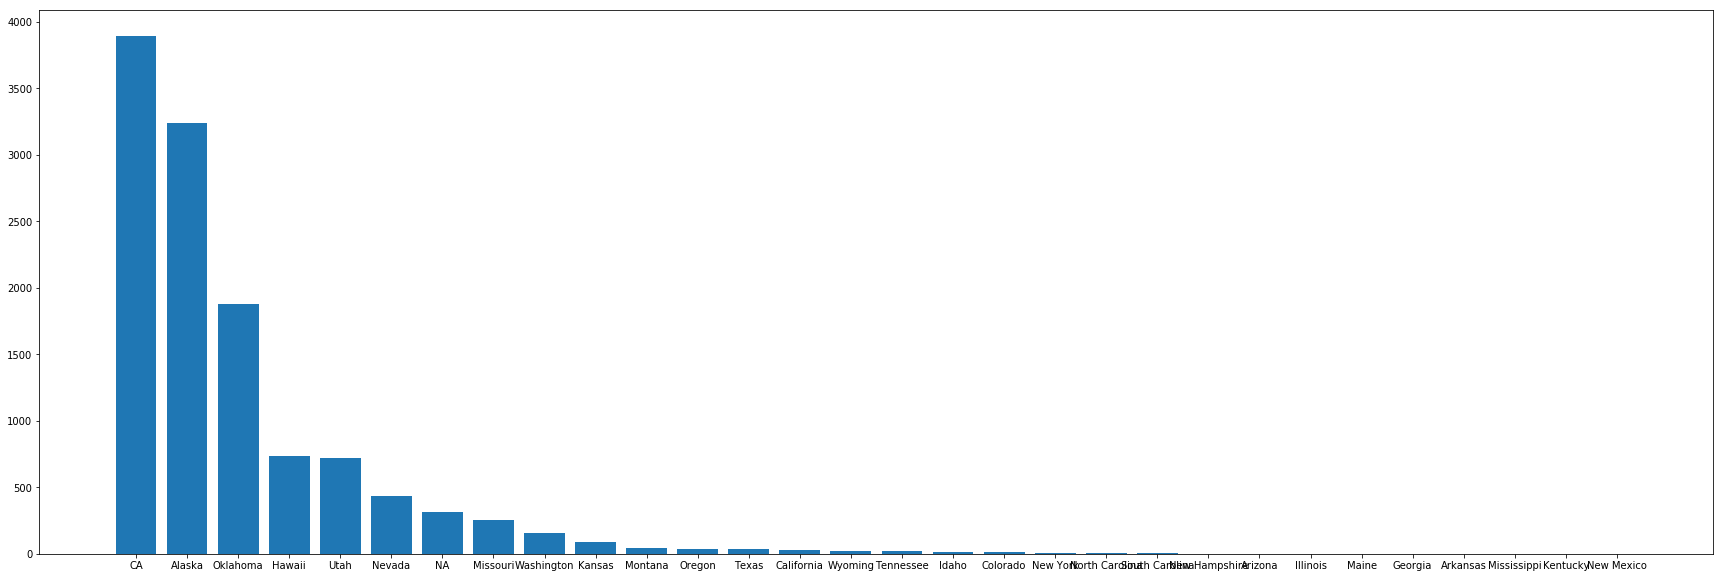

In [217]:
plt.figure(figsize=(30,10))
plt.bar(df['State'].unique(),df['State'].value_counts().values)
plt.show()

In [101]:
df[df['State'] == 'Alaska'].State.count()

3243

In [102]:
df[df['Country'] == 'USA'].Country.count()

10087

In [104]:
df[df['State'] == 'Alaska'].State.count()/df[df['Country'] == 'USA'].Country.count()*100

32.15029245563596

In [191]:
alaska = df[df['State'] == 'Alaska'].State.count()

In [215]:
rest = df[(df['State'] != 'Alaska') & (df['State'] != 'NA')].State.value_counts().values.sum()
rest

6844

In [216]:
Val = [alaska,rest]

[3243, 6844]

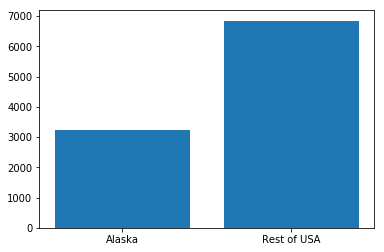

In [218]:
plt.bar((['Alaska','Rest of USA']),Val)
plt.show()

Hypotheses 2 :

Given the data about earthquakes, I could hypothesize that Indonesia experience more earthquakes in a month than Egypt as Indonesia lies in the ring of fire. My claim is based on the source: https://news.sky.com/story/ring-of-fire-why-indonesia-has-so-many-earthquakes-11514214

In [225]:
Egypt = df[df['Country'] == 'Egypt'].Country.count()

In [241]:
Indonesia = df[df['Country'] == 'Indonesia'].Country.count()


<function matplotlib.pyplot.show(*args, **kw)>

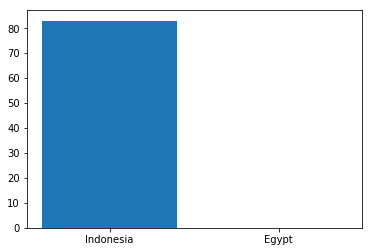

In [246]:
plt.bar((['Indonesia','Egypt']),([Indonesia,Egypt]))
plt.show